In [1]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
! pip install kaggle #installing kaggle

In [3]:
! mkdir ~/.kaggle #making directory

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 98% 647M/663M [00:05<00:00, 152MB/s]
100% 663M/663M [00:05<00:00, 117MB/s]


In [7]:
! ls

kaggle.json  sample_data  tuberculosis-tb-chest-xray-dataset.zip


In [8]:
! unzip tuberculosis-tb-chest-xray-dataset.zip #unzipping files

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [9]:
import pandas as pd
import os


filenames = os.listdir("TB_Chest_Radiography_Database/Normal")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [10]:
df1.head(5)

,filename,category
0,Normal-2051.png,0
1,Normal-2321.png,0
2,Normal-1551.png,0
3,Normal-1557.png,0
4,Normal-2484.png,0


In [11]:
len(df1)

3500

In [12]:
categories2=[]
filenames2 = os.listdir("TB_Chest_Radiography_Database/Tuberculosis") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [13]:
df2.head(5)

,filename,category
0,Tuberculosis-197.png,1
1,Tuberculosis-17.png,1
2,Tuberculosis-70.png,1
3,Tuberculosis-376.png,1
4,Tuberculosis-373.png,1


In [14]:
len(df2)

700

In [15]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [16]:
df.head(5)

,filename,category
0,Normal-2051.png,0
1,Normal-2321.png,0
2,Normal-1551.png,0
3,Normal-1557.png,0
4,Normal-2484.png,0


In [17]:
len(df)

4200

In [18]:
df['filename']

0            Normal-2051.png
1            Normal-2321.png
2            Normal-1551.png
3            Normal-1557.png
4            Normal-2484.png
                ...         
4195    Tuberculosis-259.png
4196    Tuberculosis-527.png
4197    Tuberculosis-206.png
4198    Tuberculosis-333.png
4199    Tuberculosis-291.png
Name: filename, Length: 4200, dtype: object

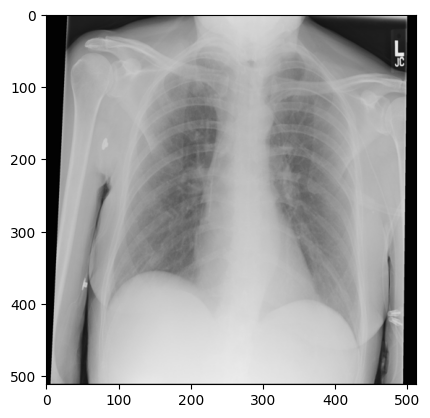

In [19]:
#showing a sample image of normal chest xray
# >=3500 = tuberculosis, <=3500=normal images
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('TB_Chest_Radiography_Database/Normal/'+df['filename'][1700], cv2.IMREAD_COLOR)
plt.imshow(img)

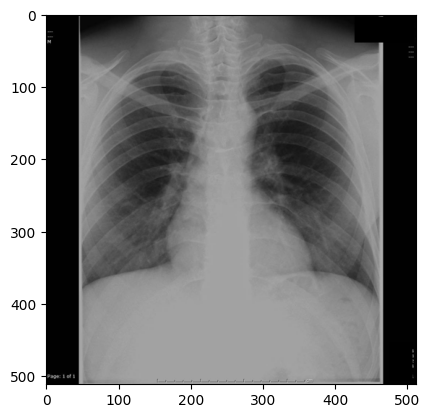

In [20]:
#showing a sample image of tuberculosis chest xray
# >3500 = tuberculosis, <=3500=normal images
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('TB_Chest_Radiography_Database/Tuberculosis/'+df['filename'][3700], cv2.IMREAD_COLOR)
plt.imshow(img)

In [21]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((4200,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('TB_Chest_Radiography_Database/Normal/'+image_file)
    i+=1

for image_file in df2['filename']:
    X[i,:] = resize_img('TB_Chest_Radiography_Database/Tuberculosis/'+image_file)
    i+=1

In [22]:
X.shape

(4200, 80, 80, 3)

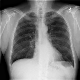

In [23]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [24]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2940, 80, 80, 3)
y_train shape: (2940,)
X_validation shape: (630, 80, 80, 3)
y_validation shape: (630,)
X_test shape: (630, 80, 80, 3)
y_test shape: (630,)


In [25]:
type(y_test)

pandas.core.series.Series

In [26]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    525
1    105
Name: category, dtype: int64
Count of 0: 525
Count of 1: 105


In [27]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    525
1    105
Name: category, dtype: int64
Count of 0: 525
Count of 1: 105


In [28]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    2450
1     490
Name: category, dtype: int64
Count of 0: 2450
Count of 1: 490


EfficientNetV2B1

In [29]:
# Convert from numpy data to tf.data.Dataset
ds_train = tf.data.Dataset.from_tensor_slices( (X_train, y_train) )
ds_valid = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [30]:
ds_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(80, 80, 3), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [31]:
# Build transformation pipeline for numpy Datasets
def preprocess(image, label):
  #image = tf.expand_dims(image, axis=2) # use tf method
          # note that we don't have the first dimension (# of images) as this
          # function is receiving one Dataset element at a time
          # so use axis number one less than np
          # could use axis=-1 and tf adds at end
  #image = tf.image.grayscale_to_rgb(image)
  image = tf.image.resize(image, [224, 224])
  return (image, label)

ds_train = ds_train.map(preprocess).batch(32).prefetch(1)
ds_valid = ds_valid.map(preprocess).batch(32).prefetch(1)
ds_test = ds_test.map(preprocess).batch(32).prefetch(1)

In [32]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [33]:
# Use EfficientNet V2
base_model_3X = keras.applications.EfficientNetV2B1(weights="imagenet",
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model_3X.output)
dense1 = keras.layers.Dense(1024, activation="relu")(global_avg)
dense2 = keras.layers.Dense(512, activation="relu")(dense1)
dropout = keras.layers.Dropout(0.05)(dense2)
output = keras.layers.Dense(1, activation="sigmoid")(dropout)
model_3X = keras.models.Model(inputs=base_model_3X.input, outputs=output)

28456008/28456008 [==============================] - 0s 0us/step


In [34]:
# Freeze transferred layers and train
%%time
for layer in base_model_3X.layers:
    layer.trainable = False

model_3X.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history_3X = model_3X.fit(ds_train,
                    epochs=50, validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
92/92 [==============================] - 32s 125ms/step - loss: 0.1042 - accuracy: 0.9595 - val_loss: 0.0553 - val_accuracy: 0.9794
Epoch 2/50
92/92 [==============================] - 7s 81ms/step - loss: 0.0365 - accuracy: 0.9874 - val_loss: 0.0298 - val_accuracy: 0.9873
Epoch 3/50
92/92 [==============================] - 8s 82ms/step - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0266 - val_accuracy: 0.9921
Epoch 4/50
92/92 [==============================] - 7s 79ms/step - loss: 0.0244 - accuracy: 0.9908 - val_loss: 0.0796 - val_accuracy: 0.9762
Epoch 5/50
92/92 [==============================] - 8s 88ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0513 - val_accuracy: 0.9857
Epoch 6/50
92/92 [==============================] - 7s 79ms/step - loss: 0.0149 - accuracy: 0.9946 - val_loss: 0.0297 - val_accuracy: 0.9889
Epoch 7/50
92/92 [==============================] - 7s 80ms/step - loss: 0.0248 - accuracy: 0.9912 - val_loss: 0.0241 - val_accuracy: 0.9921
Epoch 8/50


In [35]:
# Unfreeze layers and train
%%time
for layer in base_model_3X.layers:
    layer.trainable = True

model_3X.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
history_3X = model_3X.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
92/92 [==============================] - 122s 336ms/step - loss: 0.1698 - accuracy: 0.9435 - val_loss: 0.0300 - val_accuracy: 0.9889
Epoch 2/100
92/92 [==============================] - 28s 308ms/step - loss: 0.0195 - accuracy: 0.9929 - val_loss: 0.0111 - val_accuracy: 0.9952
Epoch 3/100
92/92 [==============================] - 28s 307ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0049 - val_accuracy: 0.9984
Epoch 4/100
92/92 [==============================] - 28s 308ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0050 - val_accuracy: 0.9968
Epoch 5/100
92/92 [==============================] - 28s 306ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0082 - val_accuracy: 0.9968
Epoch 6/100
92/92 [==============================] - 28s 308ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0057 - val_accuracy: 0.9952
Epoch 7/100
92/92 [==============================] - 28s 307ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0091 - val_accuracy

In [36]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model_3X.evaluate(ds_valid)
print(f"Validation Accuracy: {val_accuracy:.4f}")

20/20 [==============================] - 1s 64ms/step - loss: 0.0049 - accuracy: 0.9984
Validation Accuracy: 0.9984


In [37]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_3X.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

20/20 [==============================] - 1s 63ms/step - loss: 0.0182 - accuracy: 0.9921
Test Accuracy: 0.9921


In [38]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_3X = history_3X.history["accuracy"]
val_accuracy_values_3X = history_3X.history["val_accuracy"]

20/20 [==============================] - 13s 66ms/step


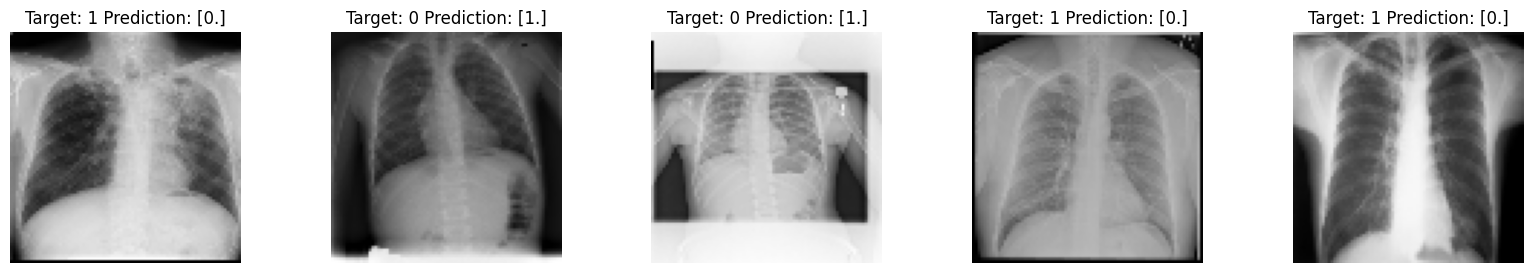

In [39]:
#showing 5 misclassified images from the best model i.e. EfficientNet V2
import matplotlib.pyplot as plt

predictions = model_3X.predict(ds_test)
predictions_binary = np.round(predictions)

# Display misclassified images
plt.figure(figsize=(20, 3))
misclassifiedIndexes = [] # Initialize an empty list to store the indices of misclassified images
for data_index in range(len(predictions_binary)):
   # Loop through each index in the predictions_binary array (from 0 to len(predictions_binary) - 1)
    if y_test.iloc[data_index] != predictions_binary[data_index]:
        misclassifiedIndexes.append(data_index)

for plot_index, data_index in enumerate(misclassifiedIndexes[:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(X_test[data_index].astype('uint8'))
    plt.title(f'Target: {y_test.iloc[data_index]} Prediction: {predictions_binary[data_index]}')
    plt.axis('off')
plt.show()

In [40]:
# Resize after preprocessing
# ResNet requires at least a 32x32 image (used to require 224x224 but seems to accept 32x32 now)
X_test_resized = tf.image.resize(X_test, [224, 224])

# Predictions on the resized test set
y_pred = model_3X.predict(X_test_resized)

20/20 [==============================] - 3s 62ms/step


Overall Accuracy: 0.9921
Precision: 0.9808
Recall: 0.9714
F1 Score: 0.9761


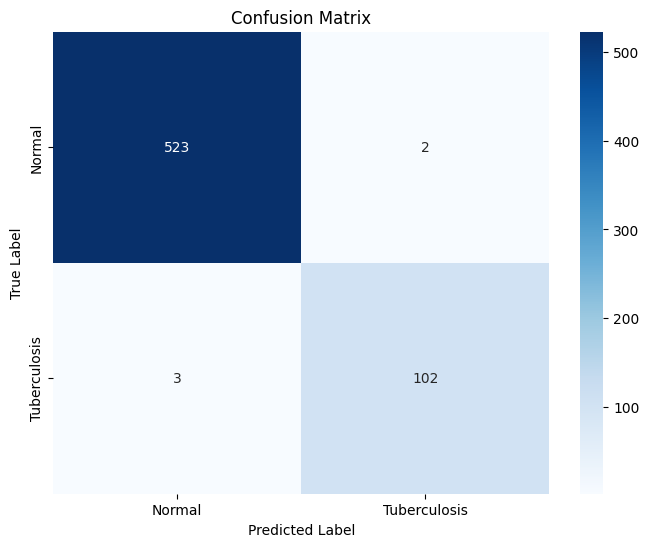

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
#y_pred = model_3X.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten arrays for evaluation
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred_binary)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_flat)
print(f"Overall Accuracy: {accuracy:.4f}")

# Precision, Recall, F1 Score
precision = precision_score(y_test_flat, y_pred_flat)
recall = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Accuracy for Class 0 (Normal): 0.9962
Accuracy for Class 1 (Tuberculosis): 0.9714
Precision: 0.9808
Recall: 0.9714
F1 Score: 0.9761


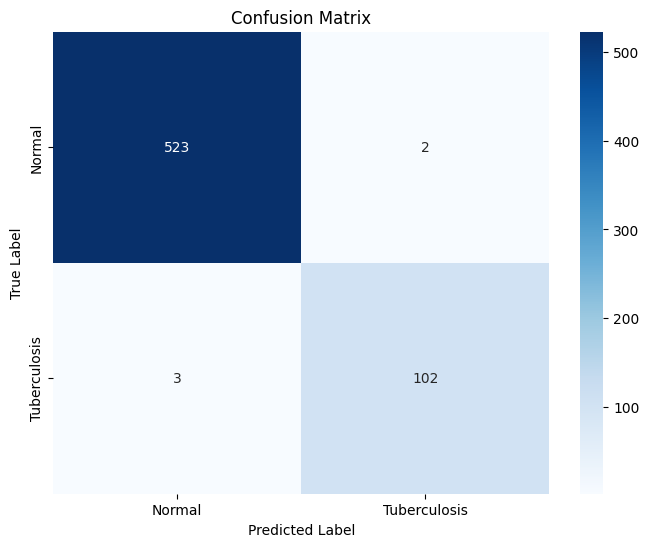

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
#y_pred = model_1X.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten arrays for evaluation
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred_binary)

# Accuracy for each class
accuracy_class_0 = accuracy_score(y_test_flat[y_test_flat == 0], y_pred_flat[y_test_flat == 0])
accuracy_class_1 = accuracy_score(y_test_flat[y_test_flat == 1], y_pred_flat[y_test_flat == 1])

print(f"Accuracy for Class 0 (Normal): {accuracy_class_0:.4f}")
print(f"Accuracy for Class 1 (Tuberculosis): {accuracy_class_1:.4f}")

# Other metrics (Precision, Recall, F1 Score)
precision = precision_score(y_test_flat, y_pred_flat)
recall = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Finish